# <font color=#EEAA11> HW 03: Visualization, IDA and EDA </font>


![missing](https://jenslaufer.com/figure/source/2019-02-05-visualize_missing_values_with_ggplot/unnamed-chunk-13-1.png)


### Instructions for Submitting Names in Notebooks

Please follow the format below when typing your names in the notebook. 

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**

#### Example:
    Poe, Edgar Allan

> ⚠️ **Failure to follow this format will result in a reduction of your grade.**


Belieu, Joshua Alan


## <font color=#00BBFF> Problem #1 - IDA (10 pts) </font>

In this problem you are going to explore IDA: Initial Data Analysis, which is can be defined many ways, but we will assume it contains these steps:
* Data collection and importation
* Data cleaning and preprocessing
* Variable identification and classification
* Basic descriptive statistics
* Data quality assessment
* Missing data analysis
* Outlier detection

🤓 Follow these steps:
* import the planets dataset, which is in Seaborn
    - in this case, the data has been collected for us and you simply need to import it into a Pandas dataframe
* based on your initial assessment of this dataset, how should it be cleaned and processed? discuss your observations in a markdown cell and write the code to complete this task
* what types of variables are there? ordinal? categorical? cardinal? add this to your discussion in the markdown cell
* find the statistics of the different features of the data; what simple methods are in Pandas are there for this? are there variables for which this doesn't make sense? do any of them need to be encoded? 
* based on what you see so far, what is the quality of this data? basic IDA for this might include using `.describe` and `.info` 
* did you note any missing data? make a heat map of this dataset that shows missing values (I have given an example code for this in the past, but feel free to write your own); 
* for each feature/column for which it makes sense, scale the column using the z-score and print the number of outliers for that column (that is, how many rows in the column have values $<-3$ or $>3$ after scaling?)



These IDA steps have already revealed important properties of this dataset. You will want to follow these steps for your project and document what you found. A nice feature of a web app is to have a tab, perhaps called "Dataset(s)", that describes the dataset(s) used for the app. 
____

Next, let's examine EDA, which follows the IDA steps. Let's summarize IDA in a table and compare to EDA:

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_planets = sns.load_dataset("planets")
display(df_planets)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [3]:
df_planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [4]:
df_planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


✏️ **Answer**

1] based on your initial assessment of this dataset, how should it be cleaned and processed? discuss your observations in a markdown cell and write the code to complete this task

The largest things I saw was:

1) Some missing values in the aspects of the objects, which means we could impute them once we learn how to. For now, I will remove the NaNs
2) It would probably be a good idea to scale the orbital period, mass, and distance features.
3) We could encode the method column for ease of plotting.


2] what types of variables are there? ordinal? categorical? cardinal? add this to your discussion in the markdown cell

Categorical -> method, year

Discrete numerical -> number, year

Continuous numerical -> orbital period, mass, and distance

3] find the statistics of the different features of the data; what simple methods are in Pandas are there for this? are there variables for which this doesn't make sense? do any of them need to be encoded?

I would use df.describe(). I would argue this doesn't make sense for method (these are not numbers) and year (I feel like you should blend where the telescope was pointed in addition to the date to extract more meaningful data).


4] based on what you see so far, what is the quality of this data? basic IDA for this might include using `.describe` and `.info` 

The data looks alright. Mass is missing ~50% of its entries, and distance is ~80%.

5] did you note any missing data? make a heat map of this dataset that shows missing values (I have given an example code for this in the past, but feel free to write your own);

Yes, there was missing data (see below).

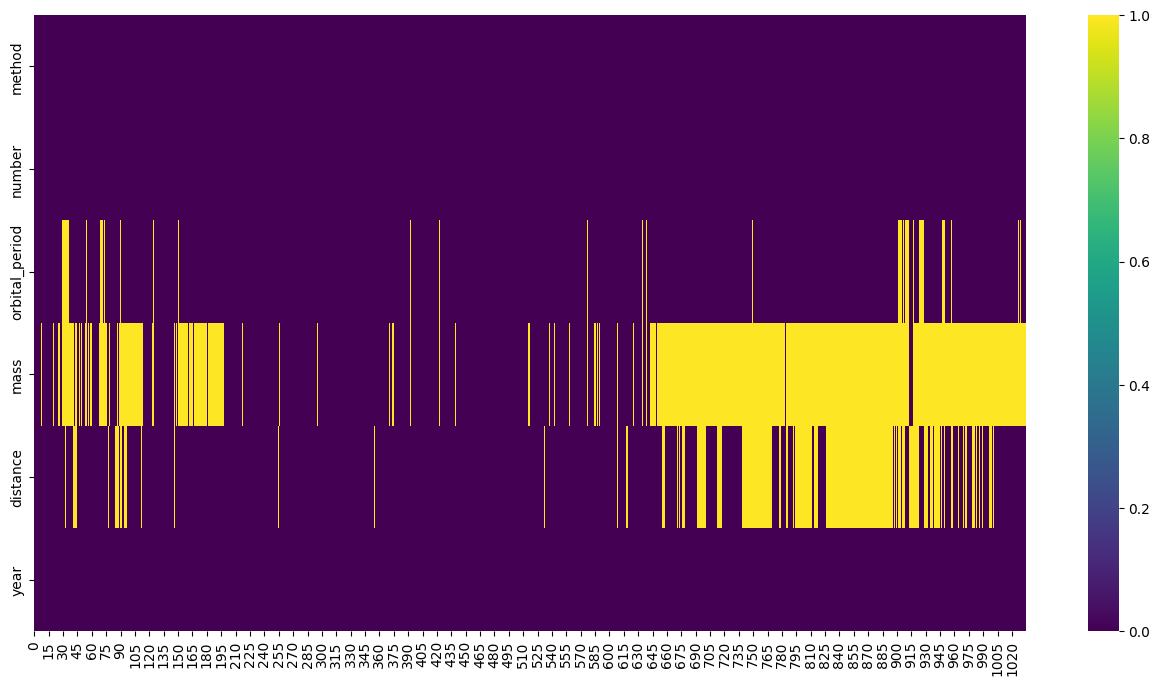

In [5]:
plt.figure(figsize=(16,8))
sns.heatmap(df_planets.isna().transpose(),cmap='viridis');

In [6]:
from sklearn.preprocessing import StandardScaler

cleaned_planets = df_planets.dropna()

scaler = StandardScaler()
df_planets_scaled = cleaned_planets.copy()
df_planets_scaled[['mass', 'distance','orbital_period']] = scaler.fit_transform(df_planets_scaled[['mass', 'distance','orbital_period']])
df_planets_scaled.describe()

,number,orbital_period,mass,distance,year
count,498.00000,4.980000e+02,4.980000e+02,4.980000e+02,498.000000
mean,1.73494,-2.853585e-17,1.783491e-18,-8.560756e-17,2007.377510
std,1.17572,1.001006e+00,1.001006e+00,1.001006e+00,4.167284
min,1.00000,-5.685613e-01,-6.897828e-01,-1.089561e+00,1989.000000
25%,1.00000,-5.433891e-01,-6.322762e-01,-5.922914e-01,2005.000000
50%,1.00000,-3.262207e-01,-3.480462e-01,-2.605459e-01,2009.000000
75%,2.00000,1.116213e-01,9.860095e-02,1.560560e-01,2011.000000
max,6.00000,1.124362e+01,6.191308e+00,6.486289e+00,2014.000000


In [7]:
display(df_planets_scaled)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,-0.385976,1.263737,0.544193,2006
1,Radial Velocity,1,0.026570,-0.082398,0.104874,2008
2,Radial Velocity,1,-0.049588,0.024963,-0.692347,2011
3,Radial Velocity,1,-0.347322,4.649722,1.257846,2007
4,Radial Velocity,1,-0.217735,2.199701,1.447968,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,-0.493358,-0.112679,-0.798471,2009
641,Radial Velocity,1,-0.566025,-0.396771,-0.163444,2013
642,Radial Velocity,1,-0.357367,-0.156724,-0.748202,1999
649,Transit,1,-0.567624,-0.286107,2.705346,2013


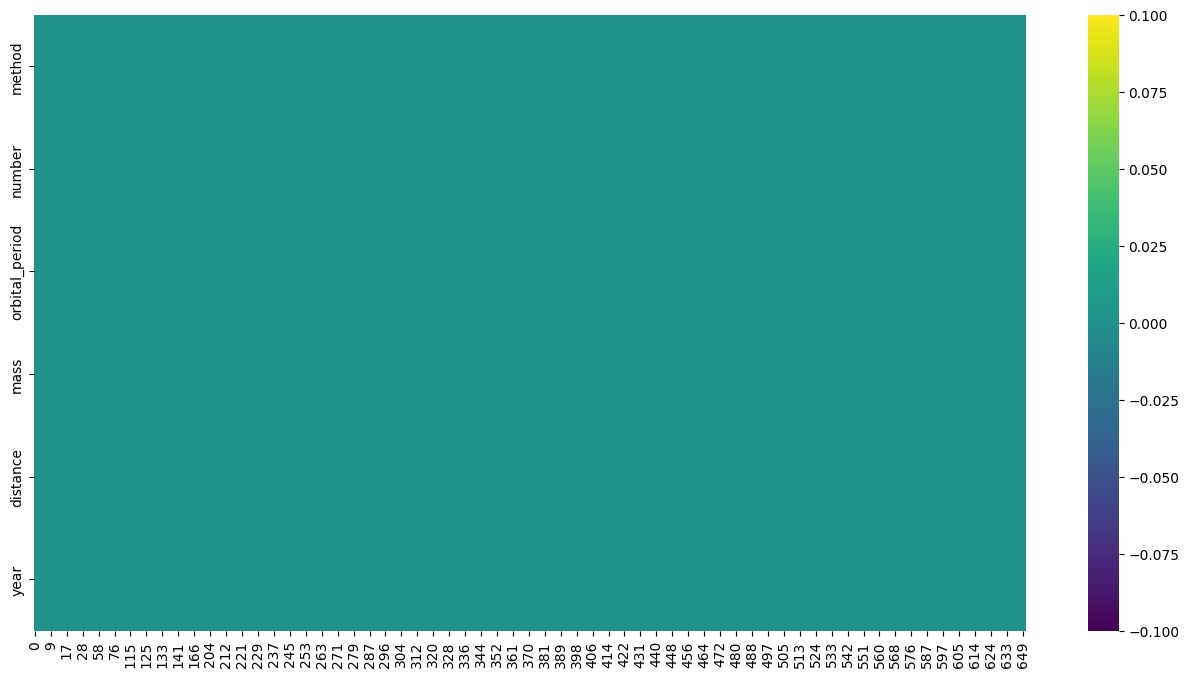

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(df_planets_scaled.isna().transpose(),cmap='viridis');

In [9]:
'''
this bit below was written with assistance from chatGPT 5.0 on 20.09.2025. I am
still getting used to masks. I know it is just a boolean array that can be used
to index a df but I still muck up the implementation sometimes.
'''

for col in ['mass', 'distance','orbital_period']:
    mask_outliers = (df_planets_scaled[col] < -3) | (df_planets_scaled[col] > 3)
    outliers = df_planets_scaled.loc[mask_outliers, [col]]
    print(f"\n--- {col} ({mask_outliers.sum()} outliers) ---")
    print(outliers.head())  # just show first few rows


--- mass (14 outliers) ---
         mass
3    4.649722
63   4.980062
161  3.493532
227  3.218249
245  3.163192

--- distance (8 outliers) ---
     distance
161  3.478721
181  6.486289
245  5.332672
396  3.634255
587  6.445687

--- orbital_period (6 outliers) ---
     orbital_period
15         8.970939
120        4.268191
166        3.235249
199        3.522102
607        3.178696


| Phase | Step | Key Activities |
|-------|------|----------------|
| IDA | 1. Data collection and importation | - Gather data from various sources<br>- Import data into analysis environment (e.g., Python, R) |
| IDA | 2. Data cleaning and preprocessing | - Handle missing values<br>- Remove duplicates<br>- Correct data types<br>- Standardize formats |
| IDA | 3. Variable identification and classification | - Identify dependent and independent variables<br>- Classify variables (numeric, categorical, etc.)<br>- Understand the meaning of each variable |
| IDA | 4. Basic descriptive statistics | - Calculate mean, median, mode<br>- Determine range, variance, standard deviation<br>- Identify minimum and maximum values |
| IDA | 5. Data quality assessment | - Check for inconsistencies<br>- Verify data accuracy<br>- Assess data completeness |
| IDA | 6. Missing data analysis | - Quantify missing data<br>- Identify patterns in missing data<br>- Decide on imputation strategy if necessary |
| IDA | 7. Outlier detection | - Identify potential outliers<br>- Assess impact of outliers<br>- Decide on treatment of outliers |
| EDA | 1. Univariate analysis | - Create histograms, box plots for numeric variables<br>- Generate bar charts for categorical variables<br>- Calculate summary statistics |
| EDA | 2. Bivariate analysis | - Create scatter plots<br>- Perform cross-tabulations<br>- Calculate correlations between pairs of variables |
| EDA | 3. Multivariate analysis | - Use dimensionality reduction techniques (e.g., PCA)<br>- Create pair plots or correlation matrices<br>- Explore interactions between multiple variables |
| EDA | 4. Correlation analysis | - Calculate correlation coefficients<br>- Create correlation heatmaps<br>- Identify strongly correlated variables |
| EDA | 5. Dimensionality assessment | - Evaluate number of features vs. observations<br>- Consider feature selection or extraction methods<br>- Assess impact of high dimensionality on analysis |
| EDA | 6. Pattern and trend identification | - Look for temporal trends in time series data<br>- Identify seasonal patterns<br>- Detect clusters or groupings in the data |
| EDA | 7. Hypothesis generation | - Formulate potential relationships between variables<br>- Develop questions for further investigation<br>- Identify areas for more detailed statistical analysis |

Note: The boundary between IDA and EDA can be fluid, and some activities may overlap or be performed iteratively throughout the analysis process.

____

## <font color=#00BBFF> Problem #2 - Exploratory Data Analysis (10 pts) </font>

In this problem you are going to explore EDA: Exploratory Data Analysis, which - _like IDA_ - is can be defined many ways, but we will assume it contains these steps:
* Univariate analysis
* Bivariate analysis
* Multivariate analysis
* Correlation analysis
* Dimensionality assessment
* Pattern and trend identification
* Hypothesis generation

Note that IDA did not involve much in the way of visualization; EDA relies heavily on visualization. An important aspect of EDA is that is, as in the name, exploratory. The goals of EDA might be:
* you have a unique dataset and you want to explore whether it contains anything that would be useful or surprising.
* you have a very specific goal in mind already and you want to explore whether this dataset can help you achieve your goal. 

Because this is EDA, with an emphasis on the E, I want you to explore this dataset with little guidance. Use your curiosity, intuition and creativity. 

🤓 Follow these steps:
* only use the Plotly library for this problem, with as many plot types as you can; interactive plots are preferred
* make about one plot per category above - if you are not familiar with a concept, skip that item (e.g., you don't know what PCA is, you have no idea how to do clustering, there are temporal trends, or whatever); shoot for about 5 plots
* but, complete 7: the EDA must lead to something to do next!! use a markdown cell for this
 

In [10]:
'''
univariate plot
'''

fig = px.histogram(df_planets_scaled, x='method', title='Distribution of method of discovery')
fig.show()

In [11]:
'''
bivariate plot
'''

fig = px.scatter(df_planets_scaled, y='method',x='year')

fig.show()

In [12]:
'''
multivariate plot
'''

fig = px.scatter(df_planets_scaled, y='orbital_period',x='distance', color='method')

fig.show()

In [13]:
'''
multivariate plot x2 because I am not all to familar with PCA and clustering.
'''

fig = px.scatter(df_planets_scaled, y='mass',x='year', color='method')

fig.show()

In [14]:
sub_df = df_planets_scaled[['orbital_period','distance','mass']]

corr_mat = sub_df.corr()

px.imshow(corr_mat, text_auto=True, color_continuous_scale='Viridis').show()

✏️ **Answer**

So I hope the story I tried to tell is evident. The radial veloctiy method is a reliable method for planet analysis. It accounts for the strongest majority of a complete dataset. It had an approximate 5 year 'retirement' but since then it has been used repeatedly up to 2014. The method seems to be adept at identifying below average orbital period and distance stars. After this exploratory analysis I am left with with the question of "why do we consider other methods than radial velocity?"

____

## <font color=#00BBFF>  Problem #3 - Projects (10 points) </font>

It is time to start working on your project!

Read the instructions on projects given in D2L and Teams so that you are very familiar with the plan. As always, please contact us on Teams with any questions that arise!

In a cell below, write your current ideas for your project. I would like this to come from you on a topic what is of interest to you. Answer these questions:
* what topics are you interested in?
* do you already have a dataset you want to work with?
* if not, explore datasets online to see if you can find several that might work
    - as we have seen, there are datasets in some of the standard Python libraries (e.g., Seaborn, sklearn, Pandas), but there are also repos like [this one](https://archive.ics.uci.edu)
* identify a definite dataset you want to work with for the next few weeks - you will be able to change it; in fact, you might find it can't do what you hope and you will have to change it
* discuss the dataset(s) you found and what you think they can do for you: it is important that there is a narrative, a purpose, a story
* from what you know today, what visualizations and interactive elements might you use in your app?

Give as many details as you can. And, if you have any concerns, discuss those as well. We need to think about risk mitigation because in data science we don't always have the data we wish we did. 



✏️ **Answer**

I am interested in physics primarily. For this reason I think astronomy datasets would be the direction to go in. There are a couple of places to look for data, like MUSES, NASA, ICE CUBE, etc.. Unfortunately, I think of two reasons why this might not work.

1] Astronomy/physics datasets are more complex and may require additional thinking than other datasets.

2] Many datasets are repeats of others. That is, we are typically interested in the same measurable quantities or we are limited in what we can measure. Therefore, we may get stuck with highly similar datasets.

With this in mind I am thinking of going down the sports or finance route. There are a number of datasets online that could be interesting. I see from the UC Irvine repos two datasets; online retail, and default of credit card clients. My intuition here is that I could tell a story that links the frequency and extent of online shopping with creditor performance. I'm envisioning the use of many scatter plots to show correlations, a correlation coefficient heat map, maybe a clustering of reduced features that would demonstrate clustering in the reduced features, some form of regression to show the behaviour of online shopping with creditor profile. Of course, these plots could be interactive as well!

____

## <font color=#00BBFF>  Problem #4 - Chapter 3 (10 points) </font>

Read Chapter 3 in your textbook. In a markdown cell, summarize your favorite story told in the chapter and discuss why it clearly illustrates the notion of causality to you. 

Next, go to [this webpage](https://www.tylervigen.com/spurious-correlations). Find the page **Discover a correlation** and scroll down to find a topic of interest to you; for example, **Google searches**. Click on one and then find something below it to correlate it with. Create the funniest pairing you can and write a short paragraph to make it seem real. There will be a channel on Teams, Spurious Correlation, where you can post your result, if you wish. Put the paragraph first, and then the plot that "proves" your hypothesis. 

Here is an example:

✏️ **Answer**

I enjoyed most the discussion regarding the firefighters. My personal exposure to the relationship between correlation and causation has been primarily one-sided. That is, I have the addage, 'correlation does not imply causation.' ingrained into me because of how common a pitfall it is to people. However, I had not really considered the inverse, 'causation need not imply correlation.' This was perfectly encapulated by the correlation of firefighters and fire damage to houses. Of course, firefighters go to fires and larger fires require more firefighters but the notion that any one particular fire having more firefighters assisting than on average is not enough evidence to support the prediction that one's house will therefore have more fire damage.

#### The cooling relief of Saturn's rings

The farther we are away from Saturn's rings the less they soothe us from headaches. Saturn is the 6th planet from our Sun and possesses concentric rings which are composed mainly of ice. A common form of relief for headaches involves wetting a rag with cool water and letting the rag rest on one's head. A recent joint research study of medical research and astronomy departments reveal that Saturn's rings provide a 'blanket' of protection from minor headaches worldwide. This effect dwindles as Saturn increases its distance from us. This revelation has prompted some pharmaceutical companies to lobby NASA to bring Saturn into closer proximity to the Earth. These facts are supported via the data,

![marg](https://www.tylervigen.com/spurious/correlation/image/37009_the-distance-between-saturn-and-earth_correlates-with_google-searches-for-headache-remedies.png)


#### Pychological Effects of Margarine

Margarine consumption causes couples to move further apart. We suspect that the slick, oily texture of margarine has a psychological effect, subtly eroding the bonds of marriage over time because meals have drifted away from slow and healthy meals to quick meals alone.

Some psychologists even theorize that margarine, being a processed substitute for butter, symbolizes a deeper discontent in the lives of those who consume it—perhaps a reflection of emotional substitutes in relationships. The message is clear: _If you love your spouse, stay away from margarine!_

With this discovery, today we are launching a public health campaign: "**Save Your Marriage, Skip the Margarine**." Margarine joins the ranks of other known relationship stressors like long commutes, financial woes, and reality TV shows.

You’ve heard the facts:  here's the data: 


![marg](https://tylervigen.com/spurious/correlation/image/5920_per-capita-consumption-of-margarine_correlates-with_the-divorce-rate-in-maine.svg)


____

![color](https://miro.medium.com/v2/resize:fit:800/0*-t4uEHHRgeJ8w-wx.png))

## <font color=#00BBFF> Problem #5 Understanding Color (0 pts) </font>

This problem does not have any points. It is for your own personal curiosity. Watch this video. 



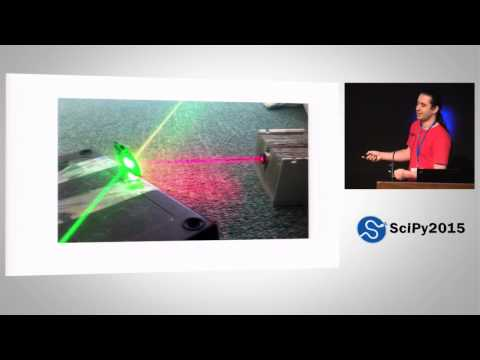

In [15]:
from IPython.display import YouTubeVideo
video_id = "xAoljeRJ3lU"
YouTubeVideo(video_id, width=560, height=315)

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.